In [1]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape
# each image consist of width of the image 32 pixels, length of the img 32 pixels, depth of the image for 3 channels(rgb)

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
# STEP 2: IMAGE EXPLORATION

36

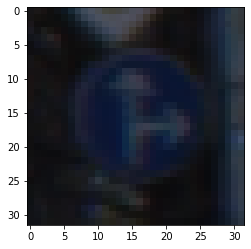

In [7]:
# index of 1000
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [8]:
# STEP 3: DATA PEPARATION
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
# convert to grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [10]:
# perform normalization, take pixels substract 128 and divided by 128. obtain central value within the pixels
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [11]:
X_train_gray_norm

array([[[[-0.86458333],
         [-0.87239583],
         [-0.87239583],
         ...,
         [-0.87760417],
         [-0.88020833],
         [-0.8828125 ]],

        [[-0.875     ],
         [-0.87239583],
         [-0.875     ],
         ...,
         [-0.8828125 ],
         [-0.87760417],
         [-0.87760417]],

        [[-0.875     ],
         [-0.87239583],
         [-0.875     ],
         ...,
         [-0.875     ],
         [-0.8671875 ],
         [-0.87760417]],

        ...,

        [[-0.88020833],
         [-0.875     ],
         [-0.8828125 ],
         ...,
         [-0.890625  ],
         [-0.88541667],
         [-0.88541667]],

        [[-0.875     ],
         [-0.875     ],
         [-0.8828125 ],
         ...,
         [-0.890625  ],
         [-0.88541667],
         [-0.890625  ]],

        [[-0.86979167],
         [-0.87760417],
         [-0.8828125 ],
         ...,
         [-0.88802083],
         [-0.88541667],
         [-0.8828125 ]]],


       [[[-0.53645833],


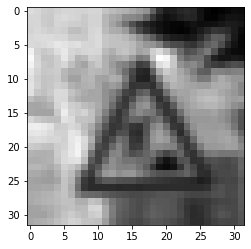

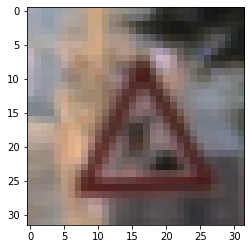

In [12]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [13]:
# STEP 4: MODEL TRAINING


In [14]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [15]:
image_shape = X_train_gray[i].shape

In [16]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [19]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [31]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 15s 206ms/step - loss: 0.0149 - accuracy: 0.9963 - val_loss: 0.5888 - val_accuracy: 0.8971
Epoch 2/50
70/70 [==============================] - 15s 208ms/step - loss: 0.0105 - accuracy: 0.9982 - val_loss: 0.6385 - val_accuracy: 0.8923
Epoch 3/50
70/70 [==============================] - 12s 168ms/step - loss: 0.0095 - accuracy: 0.9984 - val_loss: 0.7170 - val_accuracy: 0.8866
Epoch 4/50
70/70 [==============================] - 12s 169ms/step - loss: 0.0093 - accuracy: 0.9983 - val_loss: 0.7233 - val_accuracy: 0.8930
Epoch 5/50
70/70 [==============================] - 12s 168ms/step - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.6667 - val_accuracy: 0.8943
Epoch 6/50
70/70 [==============================] - 12s 173ms/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.6698 - val_accuracy: 0.8934
Epoch 7/50
70/70 [==============================] - 12s 170ms/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 0.6838 - val_accuracy: 0.8914

In [ ]:
# STEP 5: MODEL EVALUATION

In [23]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8718


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

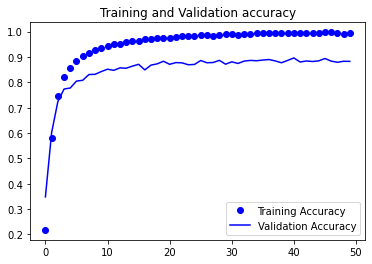

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# as we increase number of epochs we reach almost 100% of accuracy
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

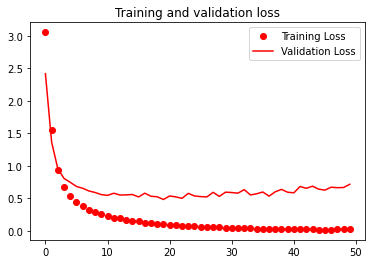

In [27]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


/Users/aika/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<AxesSubplot:>

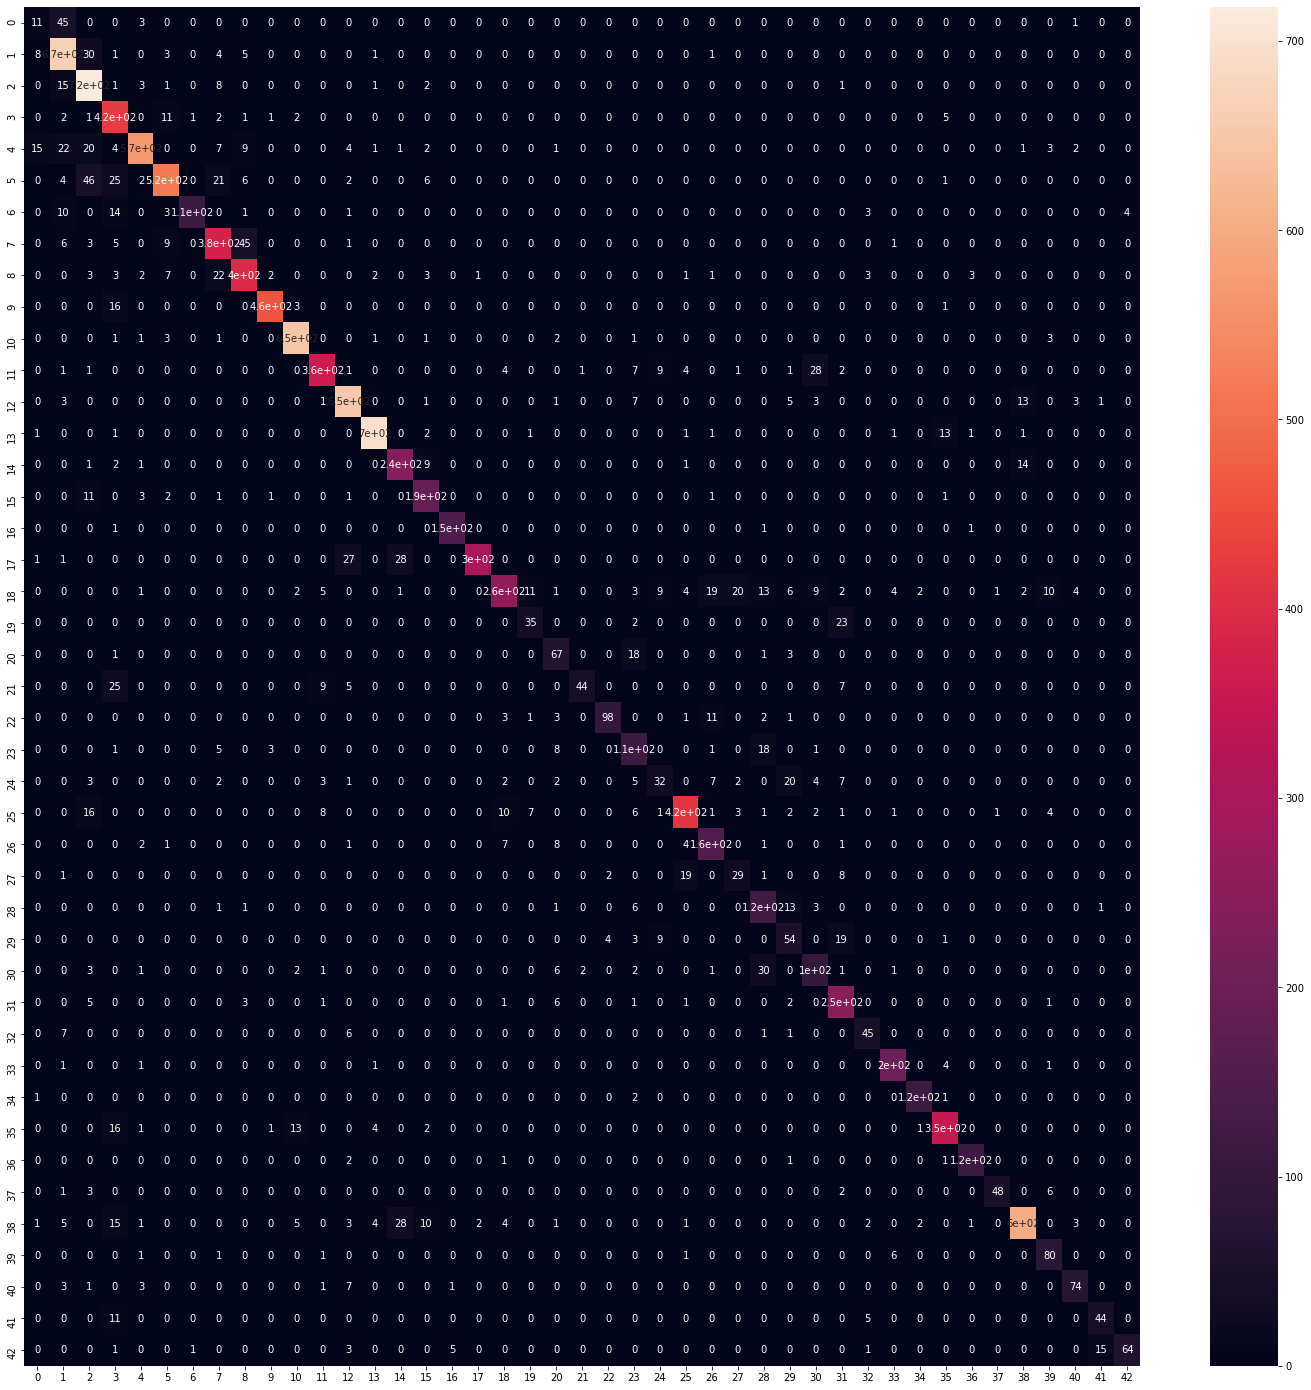

In [32]:
 from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

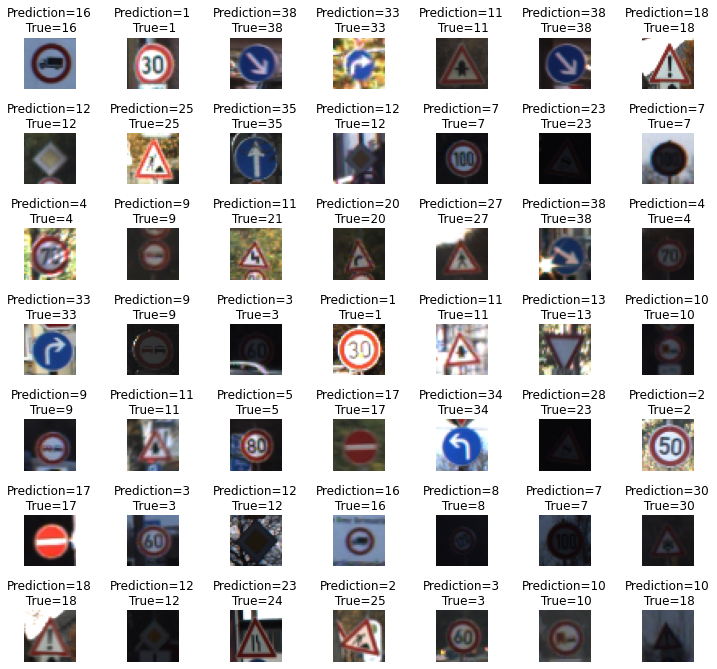

In [33]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)